In [88]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

def make_x_y(deg=2):
    X = np.array([*range(-100,100)]).reshape(-1,1) / 100

    poly_adder = PolynomialFeatures(degree=deg)
    X = poly_adder.fit_transform(X)

    thetas = np.array(np.random.randn(deg+1,1)).reshape(-1,1)
    # return thetas

    y = X.dot(thetas)
    y += np.random.normal(loc=0, scale=.1, size=(len(y),1))
    return X, y

def descend_step(thetas, gradient, step_size=.01):
    """Descend one step in the direction of gradient, multiplied by
    scalar step_size, by adding step_size*gradient to the coefficient vector
    thetas"""
    step = step_size*gradient
    return thetas + step 


def gradient_vector_thetas(X, y, thetas):
    residuals = y - X.dot(thetas)
    gradient = 2 * X.T.dot(residuals)
    return gradient

def add_intercept(X):
    """helper function to add bias/intercept column to a feature matrix X,
    returns X with a leading column of ones added"""
    X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
    return X_with_intercept


def batch_gradient_descent(X, y, eta0=.001, max_iter=100, thetas=None):
    X_bias = add_intercept(X)
    if thetas is None:
        thetas_ = np.random.randn(X_bias.shape[1],1)
    else:
        thetas_ = thetas
    
    theta_list = list([thetas_])
    for _ in range(max_iter):
        gradient_ = gradient_vector_thetas(X_bias, y, thetas_)
        thetas_ = descend_step(thetas_, gradient_, step_size=eta0)
        theta_list.append(thetas_)
    return theta_list

class LinRegScratch():
    def __init__(self, solver='closed'):
        self.solver = solver
    def fit(self, X, y):
        if self.solver == 'closed':
            # add an intercept column to X
            X_with_intercept = add_intercept(X)
            # make this accessible after fitting
            self.X_intercept = X_with_intercept

            self.thetas = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept)).dot(X_with_intercept.T).dot(y)
        elif self.solver == 'batch':
            self.theta_list = batch_gradient_descent(X, y)
            self.thetas = self.theta_list[-1]
        return self


    def predict(self, X):
        thetas = self.thetas
        X_predictor = np.c_[np.ones((X.shape[0],1)), X]
        self.predictions = X_predictor.dot(thetas)
        return self.predictions

X, y = make_x_y()


In [89]:
lin_reg_scratch = LinRegScratch(solver='batch')
lin_reg_scratch.fit(X, y)
preds = lin_reg_scratch.predict(X)

In [90]:
lin_reg_scratch.solver

'batch'

In [91]:
preds

array([[1.02243031],
       [1.02625464],
       [1.02999055],
       [1.03363803],
       [1.03719708],
       [1.04066771],
       [1.0440499 ],
       [1.04734367],
       [1.05054901],
       [1.05366592],
       [1.05669441],
       [1.05963446],
       [1.06248609],
       [1.06524929],
       [1.06792406],
       [1.0705104 ],
       [1.07300831],
       [1.0754178 ],
       [1.07773886],
       [1.07997149],
       [1.08211569],
       [1.08417146],
       [1.08613881],
       [1.08801773],
       [1.08980822],
       [1.09151028],
       [1.09312391],
       [1.09464911],
       [1.09608589],
       [1.09743424],
       [1.09869416],
       [1.09986565],
       [1.10094872],
       [1.10194335],
       [1.10284956],
       [1.10366734],
       [1.10439669],
       [1.10503762],
       [1.10559011],
       [1.10605418],
       [1.10642982],
       [1.10671703],
       [1.10691581],
       [1.10702617],
       [1.1070481 ],
       [1.10698159],
       [1.10682666],
       [1.106

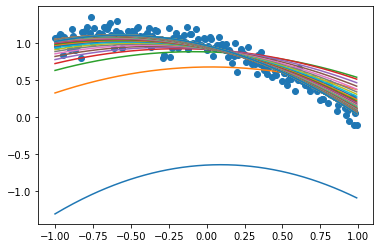

In [95]:
X_predictor = np.c_[np.ones((X.shape[0],1)), X]
plt.scatter(X[:, 1], y)
residuals = []
i_s = [*range(len(lin_reg_scratch.theta_list))]
for i in lin_reg_scratch.theta_list:
    predictions = X_predictor.dot(i)
    residuals.append(np.sum((y - predictions)**2))

    plt.plot(X[:, 1], predictions)


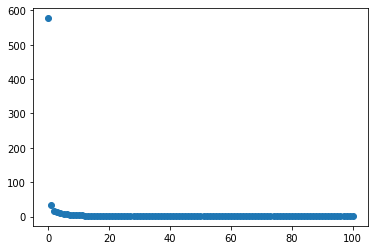

In [96]:
plt.scatter(i_s, residuals)

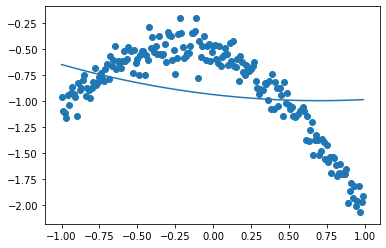

In [85]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 1], y)
# for _, i in enumerate(list(theta_fit)):
#     print(list(theta_fit)[i])
    # preds = add_intercept(X).dot()
    # plt.plot(preds)

plt.plot(X[:, 1], preds)

In [76]:
lin_reg_scratch.predict(X)

array([[-90331320.55553183],
       [-90063127.51555529],
       [-89797604.49108174],
       [-89534751.48211122],
       [-89274568.48864366],
       [-89017055.51067911],
       [-88762212.54821755],
       [-88510039.601259  ],
       [-88260536.66980343],
       [-88013703.75385085],
       [-87769540.85340127],
       [-87528047.9684547 ],
       [-87289225.09901111],
       [-87053072.24507052],
       [-86819589.40663293],
       [-86588776.58369833],
       [-86360633.77626672],
       [-86135160.98433812],
       [-85912358.2079125 ],
       [-85692225.4469899 ],
       [-85474762.70157027],
       [-85259969.97165364],
       [-85047847.25724001],
       [-84838394.55832937],
       [-84631611.87492172],
       [-84427499.20701708],
       [-84226056.55461544],
       [-84027283.91771677],
       [-83831181.29632112],
       [-83637748.69042845],
       [-83446986.10003878],
       [-83258893.52515212],
       [-83073470.96576843],
       [-82890718.42188776],
       [-82710

In [67]:
print(list(theta_fit)[0])

[[ 0.92950754]
 [ 0.01398864]
 [ 1.2397027 ]
 [-0.24398783]]


In [62]:
theta_fit

AttributeError: 'list' object has no attribute 'shape'